In [9]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os.path
import pandas as pd
from skimage import data
from matplotlib import image as im
from google.colab.patches import cv2_imshow
import cv2

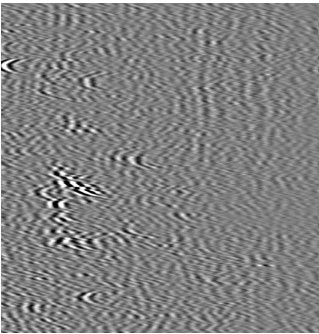

In [10]:
file = '/content/img_test.jpg'
image = im.imread(file)
cv2_imshow(image)	


(1207, 4444)


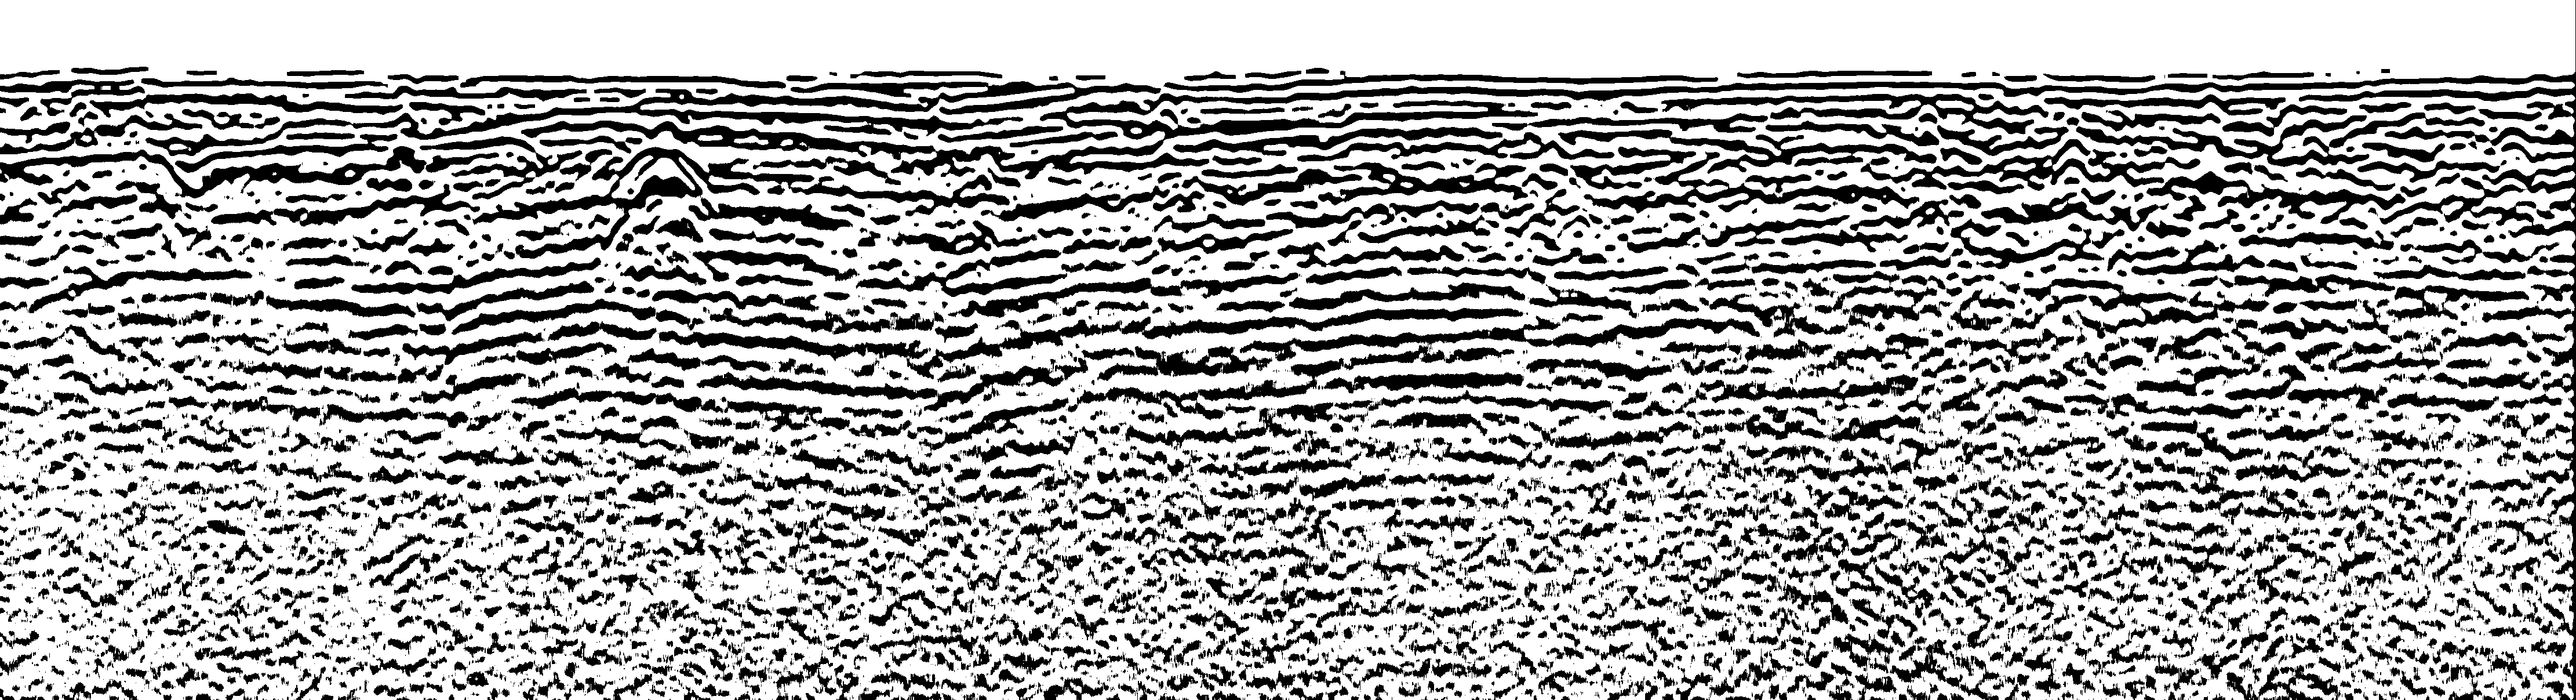

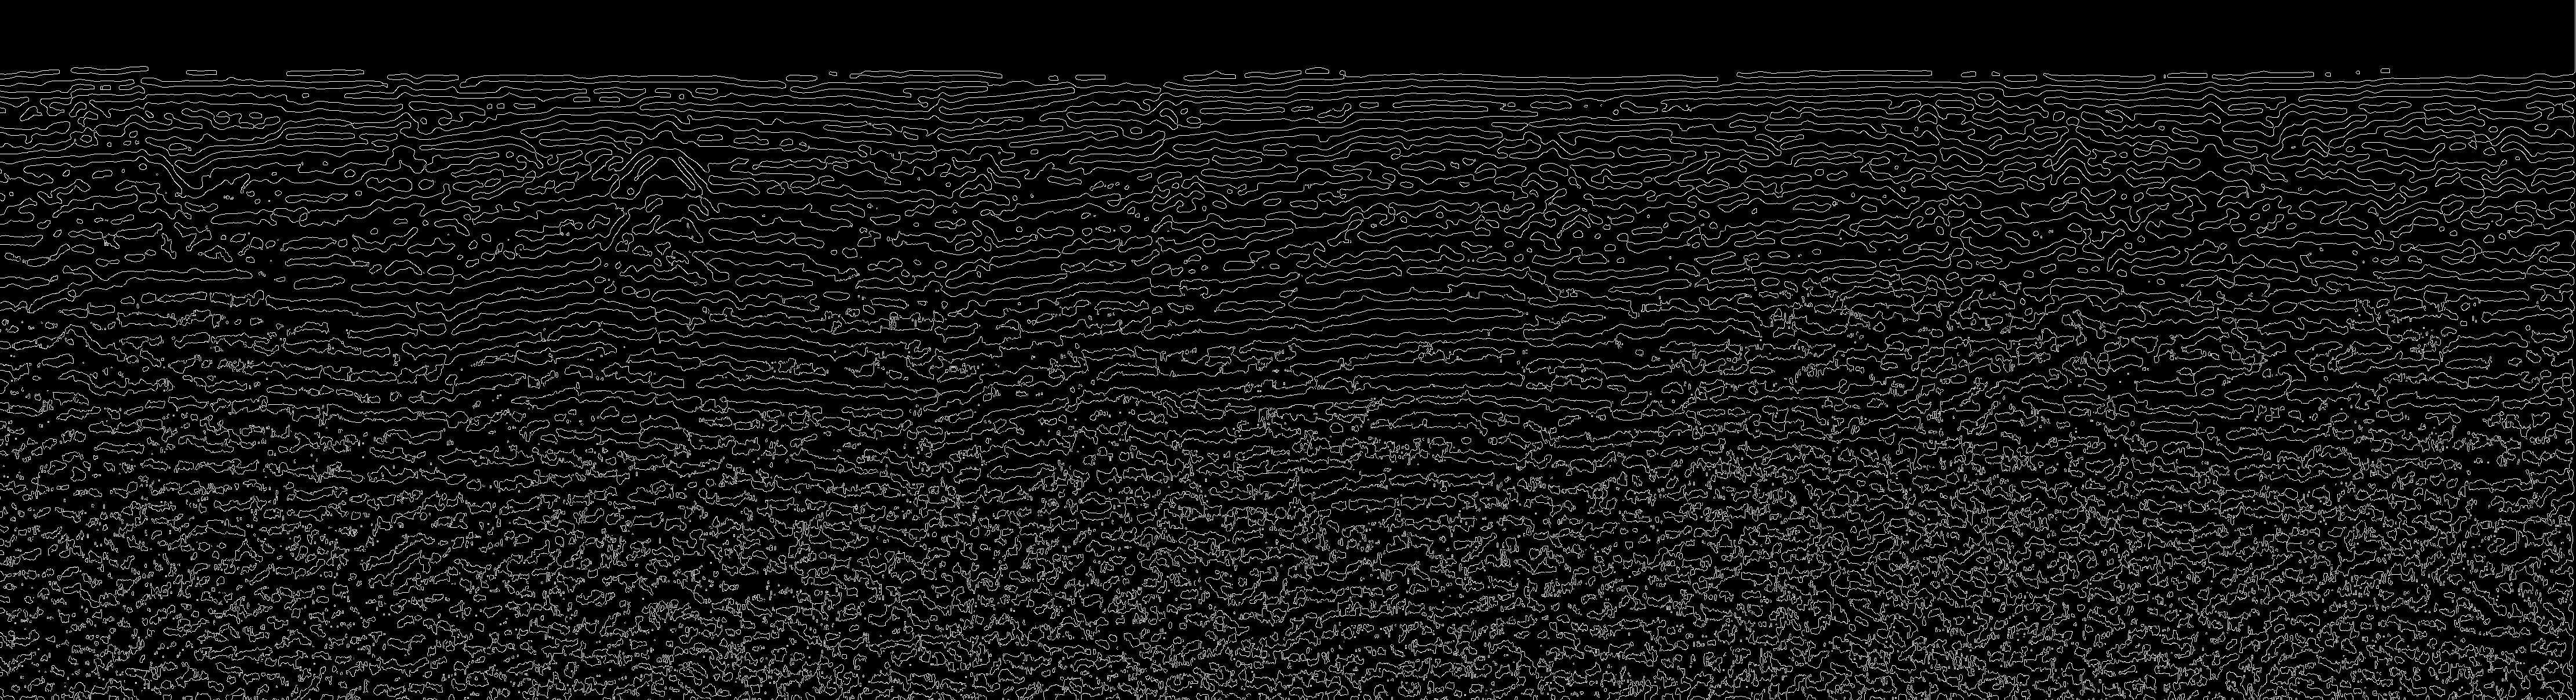

In [33]:
# Python program to illustrate
# Otsu thresholding type on an image

# organizing imports
import cv2		
import numpy as np	

# path to input image is specified and
# image is loaded with imread command
image1 = cv2.imread('/content/Img_04_cropped.JPG')

# cv2.cvtColor is applied over the
# image input with applied parameters
# to convert the image in grayscale
img = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
print(img.shape)
#img = cv2.GaussianBlur(img, (5, 5), 0)
img = cv2.medianBlur(img, 13)
# applying Otsu thresholding
# as an extra flag in binary
# thresholding	
ret, thresh1 = cv2.threshold(img, 120, 255, cv2.THRESH_BINARY +
											cv2.THRESH_OTSU)	
cv2_imshow(thresh1)
edge = cv2.Canny(thresh1, 50, 150, 9)
# the window showing output image		
# with the corresponding thresholding		
# techniques applied to the input image	
cv2_imshow(edge)		

	



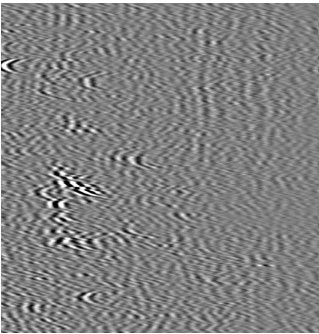

In [12]:
cv2_imshow(image)

In [13]:
im_arr = cv2.normalize(image, None, alpha = 0, beta = 255, norm_type = cv2.NORM_MINMAX, dtype = cv2.CV_32F)
im_arr = im_arr.astype(np.uint8)
im_arr = cv2.Canny(im_arr, 300, 500)

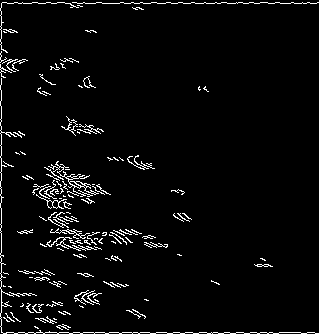

In [14]:

cv2_imshow(im_arr)

[[[9.0000000e+00 1.5882496e+00]]

 [[1.1000000e+01 1.5882496e+00]]

 [[2.6000000e+01 1.5882496e+00]]

 ...

 [[3.5000000e+01 7.8539819e-01]]

 [[4.7000000e+01 9.4247776e-01]]

 [[8.1200000e+02 2.3387411e+00]]]


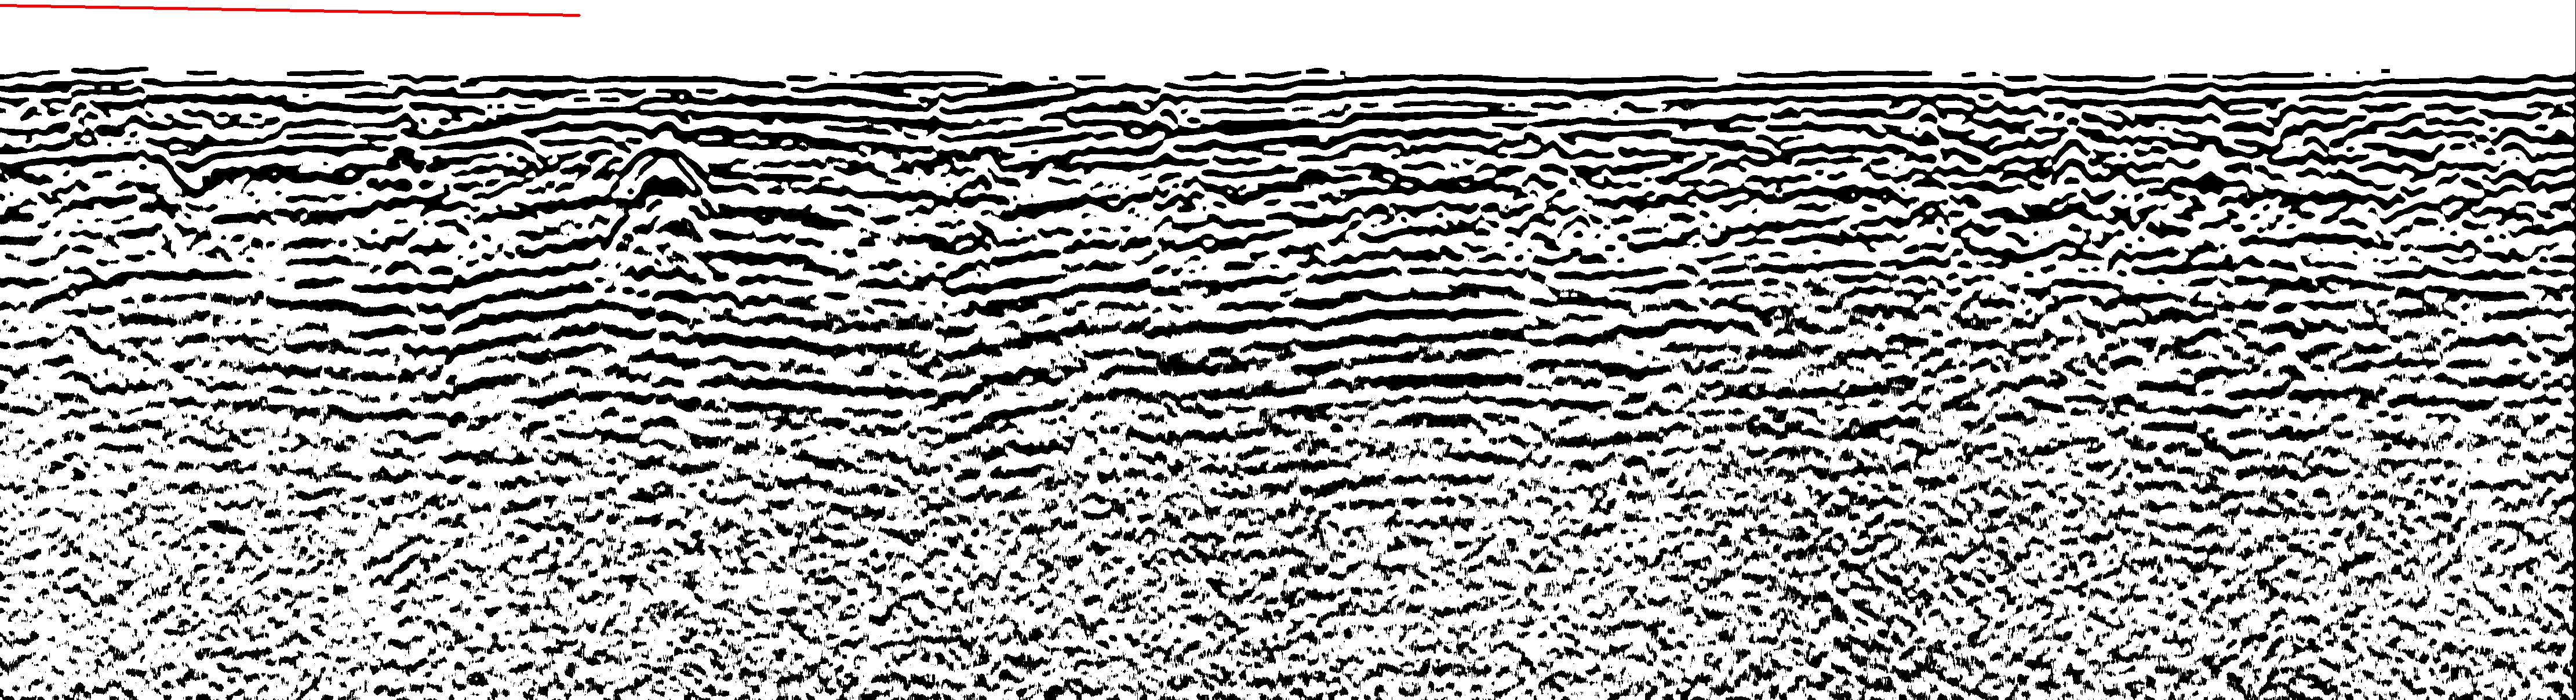

In [29]:
thresh2 = cv2.adaptiveThreshold(im_arr, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 201, 5)

#cv2_imshow(thresh2)
img_crop = cv2.cvtColor(thresh1,cv2.COLOR_GRAY2RGB)
#cv2_imshow(img_crop)
line = pd.DataFrame(columns = ['x', 'grp'])
x = []
#cv2_imshow(im_arr)
lines = cv2.HoughLines(thresh1,1,np.pi/180,100)
print(lines)

for i in range(lines.shape[0]):
  for rho,theta in lines[i]:
      a = np.cos(theta)
      b = np.sin(theta)
      x0 = a*rho
      y0 = b*rho

      x1 = x0 + 1000*(-b)
      y1 = y0 + 1000*(a)
      x2 = x0 - 1000*(-b)
      y2 = y0 - 1000*(a)
      cv2.line( img_crop, (int(x1), int(y1)), (int(x2), int(y2)), (0,0,255), 3)

      x.append(x0)
      cv2.circle(im_arr,(int(x0), int(y0)),3, (0,0,255), -1)
      break
  break

cv2_imshow(img_crop)
